In [1]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

C:\Users\B20447\Documents\GitHub\ITRI-AI-Hub\Model-Zoo\Detection\YOLOs\ArmNN\ultralytics


Cloning into 'ultralytics'...
Updating files:  26% (180/668)
Updating files:  27% (181/668)
Updating files:  28% (188/668)
Updating files:  29% (194/668)
Updating files:  30% (201/668)
Updating files:  31% (208/668)
Updating files:  32% (214/668)
Updating files:  33% (221/668)
Updating files:  34% (228/668)
Updating files:  35% (234/668)
Updating files:  36% (241/668)
Updating files:  37% (248/668)
Updating files:  38% (254/668)
Updating files:  39% (261/668)
Updating files:  40% (268/668)
Updating files:  41% (274/668)
Updating files:  42% (281/668)
Updating files:  43% (288/668)
Updating files:  44% (294/668)
Updating files:  45% (301/668)
Updating files:  46% (308/668)
Updating files:  47% (314/668)
Updating files:  48% (321/668)
Updating files:  49% (328/668)
Updating files:  50% (334/668)
Updating files:  51% (341/668)
Updating files:  52% (348/668)
Updating files:  53% (355/668)
Updating files:  54% (361/668)
Updating files:  55% (368/668)
Updating files:  56% (375/668)
Updating 

In [3]:
!pip install opencv-python==4.5.5.64

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/35.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/35.4 MB 1.7 MB/s eta 0:00:22
   ---------------------------------------- 0.2/35.4 MB 2.1 MB/s eta 0:00:17
    --------------------------------------- 0.6/35.4 MB 4.2 MB/s eta 0:00:09
   - -------------------------------------- 1.6/35.4 MB 8.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/35.4 MB 8.7 MB/s eta 0:00:04
   ------ --------------------------------- 5.7/35.4 MB 20.1 MB/s eta 0:00:02
   ------- -------------------------------- 6.8/35.4 MB 21.9 MB/s eta 0:00:02
   --------- ------------------------------ 8.8/35.4 MB 23.4 MB/s eta 0:00:02
   ------------- -------------------------- 11.9/35.4 MB 50.1 MB/s eta 0:00:01
   --------------- ------------------------ 13.3/35.4 MB 54.7 MB/s eta 0:00:01
   --------------- ------------------------ 13.3/35.4 MB 54.7 MB/s eta 0:00:01
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.2.80 requires opencv-python>=4.6.0, but you have opencv-python 4.5.5.64 which is incompatible.

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
#model.export(format='tflite', imgsz=640, batch=1)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\B20447\AppData\Local\Temp\ipykernel_26684\1249737031.py", line 1, in <module>
    from ultralytics import YOLO
  File "C:\Users\B20447\Documents\GitHub\ITRI-AI-Hub\Model-Zoo\Detection\YOLOs\ArmNN\ultralytics\ultralytics\__init__.py", line 11, in <module>
    from ultralytics.models import NAS, RTDETR, SAM, YOLO, FastSAM, YOLOWorld
  File "C:\Users\B20447\Documents\GitHub\ITRI-AI-Hub\Model-Zoo\Detection\YOLOs\ArmNN\ultralytics\ultralytics\models\__init__.py", line 3, in <module>
    from .fastsam import FastSAM
  File "C:\Users\B20447\Documents\GitHub\ITRI-AI-Hub\Model-Zoo\Detection\YOLOs\ArmNN\ultralytics\ultralytics\models\fastsam\__init__.py", line 3, in <module>
    from .model import FastSAM
  File "C:\Users\B20447\Documents\GitHub\ITRI-AI-Hub\Model-Zoo\Detection\YOLOs\A

In [ ]:
results = model.predict(source='grace_hopper.jpg', conf=0.25)
results[0].plot()

In [27]:
class LetterBox:
    def __init__(self, new_shape=(640, 640), auto=False, scaleFill=False, scaleup=True, center=True, stride=32):
        self.new_shape = new_shape
        self.auto = auto
        self.scaleFill = scaleFill
        self.scaleup = scaleup
        self.stride = stride
        self.center = center

    def __call__(self, labels=None, image=None):
        if labels is None:
            labels = {}
        img = labels.get('img') if image is None else image
        shape = img.shape[:2]
        new_shape = labels.pop('rect_shape', self.new_shape)
        if isinstance(new_shape, int):
            new_shape = (new_shape, new_shape)

        r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
        if not self.scaleup:
            r = min(r, 1.0)
        ratio = r, r
        new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
        dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]
        if self.auto:
            dw, dh = np.mod(dw, self.stride), np.mod(dh, self.stride)
        elif self.scaleFill:
            dw, dh = 0.0, 0.0[:, :,]
            new_unpad = (new_shape[1], new_shape[0])
            ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]

        if self.center:
            dw /= 2; dh /= 2
        if shape[::-1] != new_unpad:
            img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
        top, bottom = int(round(dh - 0.1)) if self.center else 0, int(round(dh + 0.1))
        left, right = int(round(dw - 0.1)) if self.center else 0, int(round(dw + 0.1))
        img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(114, 114, 114))
        if labels.get('ratio_pad'):
            labels['ratio_pad'] = (labels['ratio_pad'], (left, top))

        if len(labels):
            labels = self._update_labels(labels, ratio, dw, dh)
            labels['img'] = img
            labels['resized_shape'] = new_shape
            return labels
        else:
            return img

    def _update_labels(self, labels, ratio, padw, padh):
        labels['instances'].convert_bbox(format='xyxy')
        labels['instances'].denormalize(*labels['img'].shape[:2][::-1])
        labels['instances'].scale(*ratio)
        labels['instances'].add_padding(padw, padh)
        return labels

def xywh2xyxy(x):
    y = np.empty_like(x, dtype = np.float32)
    dw = x[..., 2] / 2
    dh = x[..., 3] / 2
    y[..., 0] = x[..., 0] - dw
    y[..., 1] = x[..., 1] - dh
    y[..., 2] = x[..., 0] + dw
    y[..., 3] = x[..., 1] + dh
    return y

def Non_Max_Suppression(boxes, scores, iou_threshold):
    boxes, scores = np.array(boxes), np.array(scores)
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]
    selected_boxes = []

    while len(order) > 0:
        i = order[0]
        selected_boxes.append(i)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])
        width = np.maximum(0.0, xx2 - xx1 + 1)
        height = np.maximum(0.0, yy2 - yy1 + 1)
        intersection = width * height
        iou = intersection / (areas[i] + areas[order[1:]] - intersection)
        to_keep = np.where(iou <= iou_threshold)[0]
        order = order[to_keep + 1]
    return selected_boxes

In [42]:
import cv2

class Object_Detector():
    def __init__(self, model_path, labels):
        self.interpreter = tf.lite.Interpreter(model_path=model_path)
        self.input_details = interpreter.get_input_details()
        self.output_details = interpreter.get_output_details()
        self.interpreter.allocate_tensors()

        self.LABEL_NAMES = labels

    def predict(self, frames):
        x = self.preprocess(frames)
        self.interpreter.set_tensor(self.input_details[0]['index'], np.array(x, dtype=np.float32))
        interpreter.invoke()
        output = self.interpreter.get_tensor(self.output_details[0]['index'])
        return self.postprocess(np.array([x if isinstance(x, np.ndarray) else x.numpy() for x in output]))

    def preprocess(self, frames):
        letterbox = LetterBox(self.input_details[0]["shape"][1: 3], auto=False, stride=32)
        im = np.array([np.ascontiguousarray(np.stack([letterbox(image=frame)])[..., ::-1])[0] for frame in frames])
        im = im.transpose((0, 3, 1, 2)).astype(np.float32)/ 255.0
        return im.transpose((0, 2, 3, 1))

    def postprocess(self, prediction, conf_thres=0.25, iou_thres=0.1, agnostic=False, labels=(), max_det=300, nc=80, max_time_img=0.05, max_nms=30000, max_wh=7680):
        bs = prediction.shape[0]
        nc = nc or (prediction.shape[1] - 4)
        nm = prediction.shape[1] - nc - 4
        mi = 4 + nc
        xc = np.max(prediction[:, 4:mi], axis=1) > conf_thres
        time_limit = 0.5 + max_time_img * bs
        prediction = np.transpose(prediction, (0, 2, 1))
        prediction[..., :4] = xywh2xyxy(prediction[..., :4])

        output = [np.zeros((0, 6 + nm))] * bs
        for xi, x in enumerate(prediction):
            x = x[xc[xi]]
            if labels and len(labels[xi]):
                lb = labels[xi]
                v = torch.zeros((len(lb), nc + nm + 4), device=x.device)
                v[:, :4] = xywh2xyxy(lb[:, 1:5])
                v[range(len(lb)), lb[:, 0].long() + 4] = 1.0
                x = np.concatenate((x, v), axis=0)
            if not x.shape[0]:
                continue
            split_indices = (4, 4 + nc, 4 + nc + nm)
            box, cls, mask = x[:, :split_indices[0]], x[:, split_indices[0]:split_indices[1]], x[:, split_indices[1]:]
            conf = np.max(cls, axis=1, keepdims=True)
            j = np.argmax(cls, axis=1, keepdims=True)
            x = np.concatenate((box, conf, j.astype(np.float32), mask), axis=1)[conf.flatten() > conf_thres]
            n = x.shape[0]
            if not n:
                continue
            if n > max_nms:
                x = x[x[:, 4].argsort(descending=True)[:max_nms]]
            c = x[:, 5:6] * (0 if agnostic else max_wh)
            boxes, scores = x[:, :4] + c, x[:, 4]
            i = Non_Max_Suppression(boxes, scores, iou_thres)
            i = i[:max_det]
            output[xi] = x[i]

        return output


LABEL_NAMES = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck',
         8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench',
         14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant',
         21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie',
         28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite',
         34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket',
         39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl',
         46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog',
         53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed',
         60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard',
         67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book',
         74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

YOLO = Object_Detector(model_path='yolov8n_saved_model/yolov8n_float32.tflite', labels=LABEL_NAMES)
frame = cv2.imread('grace_hopper.jpg')
results = YOLO.predict([frame])
results[0].shape

(271, 6)

(600, 512, 3) [   -0.12157     0.18431     0.32549     0.26275           1          13]
(600, 512, 3) [    0.10588     0.12157     0.16078     0.35686           1          47]
(600, 512, 3) [    0.14118   -0.039216     0.39216     0.28235           1          46]
(600, 512, 3) [     0.1098    -0.10392     0.32941     0.22157           1          14]
(600, 512, 3) [   0.070588    0.092157     0.17255     0.33137           1          39]
(600, 512, 3) [    0.66275    0.090196      1.1098     0.42745           1          50]
(600, 512, 3) [   -0.10196     0.32745     0.56471     0.56667           1          17]
(600, 512, 3) [    0.19804    -0.11569     0.58627     0.32745           1          11]
(600, 512, 3) [    0.13137     0.70196     0.39412       1.149           1           6]
(600, 512, 3) [    0.16667     0.33529     0.31176     0.55882           1          17]
(600, 512, 3) [    0.43137     0.12941     0.47843     0.38824           1          73]
(600, 512, 3) [  -0.029412     0

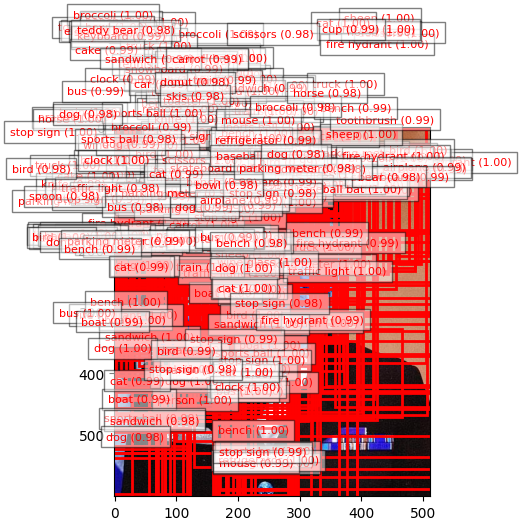

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_results(frame, results):
    fig, ax = plt.subplots(1)
    ax.imshow(frame)

    for box in results[0]:
        x1, y1, x2, y2, confidence, class_id, *_ = box
        x1, y1, x2, y2 = int(x1 * frame.shape[1]), int(y1 * frame.shape[0]), int(x2 * frame.shape[1]), int(y2 * frame.shape[0])

        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add label with confidence
        label = f"{LABEL_NAMES.get(int(class_id), 'Unknown')} ({confidence:.2f})"
        ax.text(x1, y1 - 10, label, color='r', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

plot_results(frame, results)